# Actividad 2 - Color segmentation
### Adrián Lozano González - A01661437


Importaciones necesarias

In [244]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import cv2
from matplotlib.colors import hsv_to_rgb
from skimage.io import imread, imshow
from skimage.color import rgb2hsv

## Método de scatter (RGB y HSV)

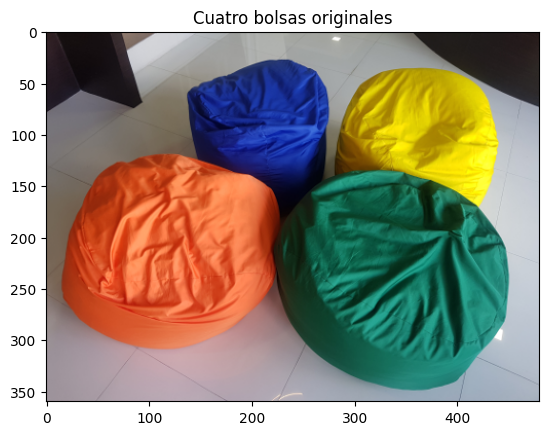

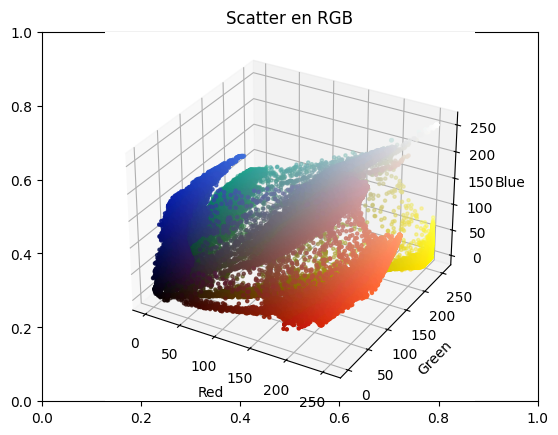

In [245]:
img = cv2.imread('bags.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Cuatro bolsas originales')
plt.show()

r, g, b = cv2.split(img)
fig = plt.figure()
plt.title('Scatter en RGB')
axis = fig.add_subplot(1, 1, 1, projection = "3d")
pixel_colors = img.reshape(np.shape(img)[0]*np.shape(img)[1], 3)
norm = colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")

plt.show()

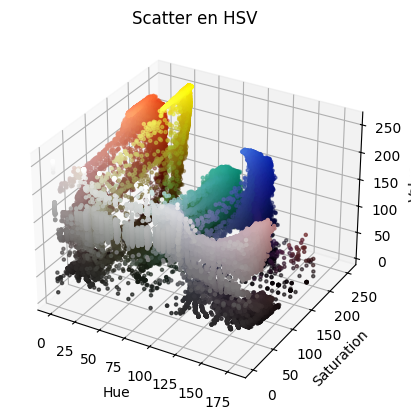

In [246]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(hsv_img)
fig = plt.figure()
axis = fig.add_subplot(1,1,1,projection="3d")
axis.scatter(h.flatten(),s.flatten(),v.flatten(), facecolors = pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.title('Scatter en HSV')
plt.show()

**Bolsa azul**

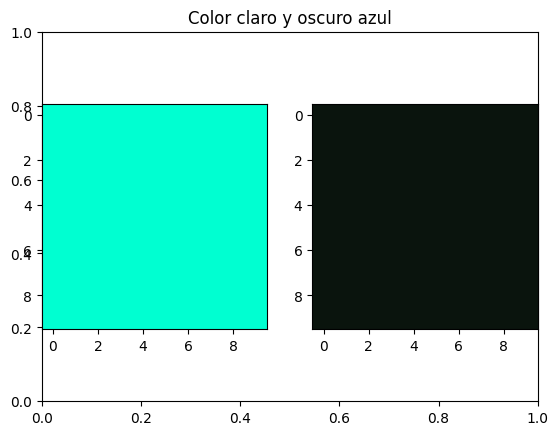

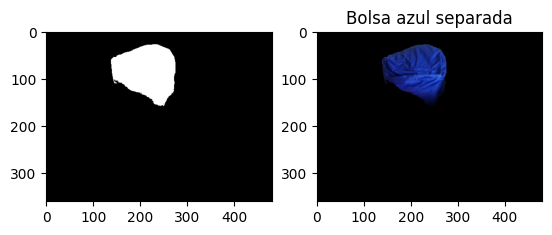

In [247]:
light_blue = (120, 255, 255)
dark_blue = (100, 127, 20)

lo_square = np.full((10, 10, 3), light_blue, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_blue, dtype=np.uint8) / 255.0


fig = plt.figure()
plt.title('Color claro y oscuro azul')
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square))

plt.show()

mask_blue = cv2.inRange(hsv_img, dark_blue, light_blue)
result = cv2.bitwise_and(img, img, mask=mask_blue)
plt.subplot(1,2,1)
plt.imshow(mask_blue, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(result)
plt.title('Bolsa azul separada')
plt.show()

**Bolsa amarilla**

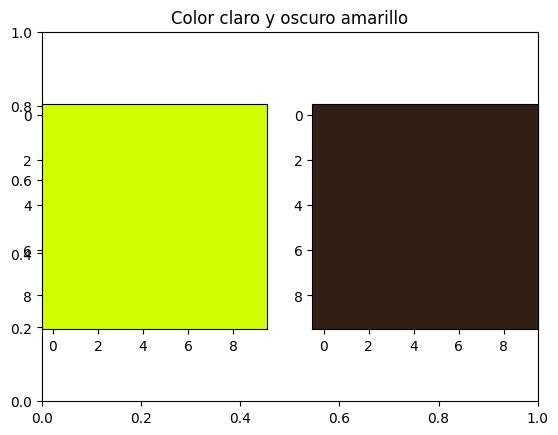

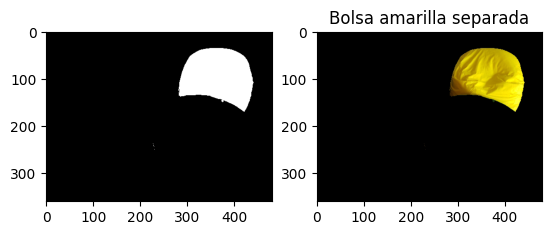

In [248]:
light_yellow = (50, 255, 255)
dark_yellow = (15, 140, 50)

lo_square = np.full((10, 10, 3), light_yellow, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_yellow, dtype=np.uint8) / 255.0

plt.title('Color claro y oscuro amarillo')
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square))
plt.show()

mask_yellow = cv2.inRange(hsv_img, dark_yellow, light_yellow)
result = cv2.bitwise_and(img, img, mask=mask_yellow)
plt.subplot(1,2,1)
plt.imshow(mask_yellow, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(result)
plt.title('Bolsa amarilla separada')
plt.show()

**Bolsa naranja**

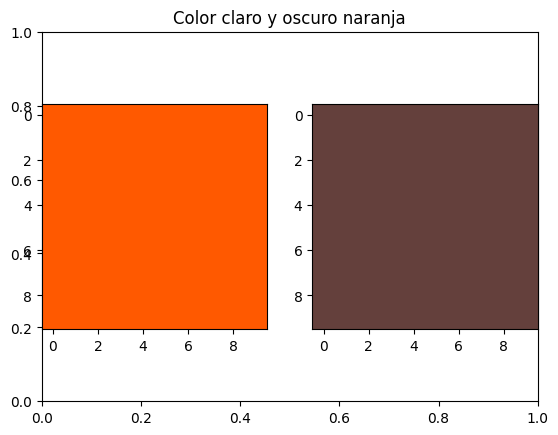

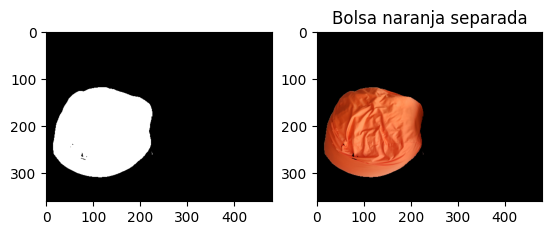

In [249]:
light_orange = (15, 255, 255)
dark_orange = (4, 100, 100)

lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

plt.title('Color claro y oscuro naranja')
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square))
plt.show()

mask_orange = cv2.inRange(hsv_img, dark_orange, light_orange)
result = cv2.bitwise_and(img, img, mask=mask_orange)
plt.subplot(1,2,1)
plt.imshow(mask_orange, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(result)
plt.title('Bolsa naranja separada')
plt.show()

**Bolsa verde**

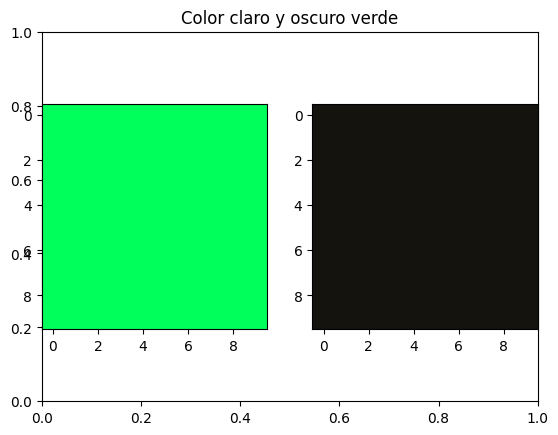

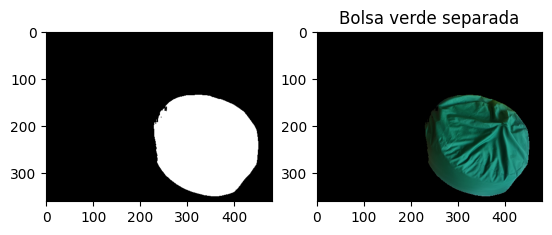

In [250]:
light_green = (100, 255, 255)
dark_green = (40, 70, 20)

lo_square = np.full((10, 10, 3), light_green, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_green, dtype=np.uint8) / 255.0

plt.title('Color claro y oscuro verde')
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square))
plt.show()

mask_green = cv2.inRange(hsv_img, dark_green, light_green)
result = cv2.bitwise_and(img, img, mask=mask_green)
plt.subplot(1,2,1)
plt.imshow(mask_green, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(result)
plt.title('Bolsa verde separada')
plt.show()

**Cuatro bolsas**

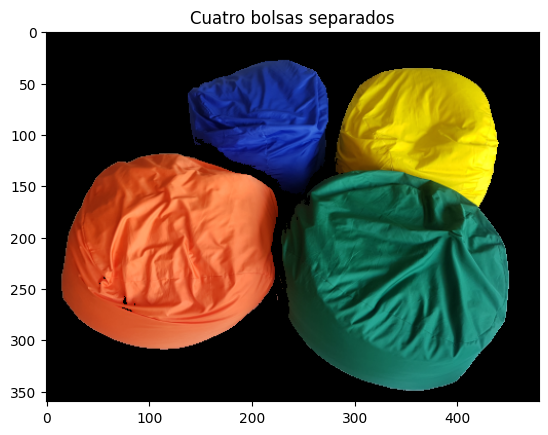

In [251]:

mask_combined = cv2.bitwise_or(mask_yellow, mask_blue)
mask_combined = cv2.bitwise_or(mask_combined, mask_green)
mask_combined = cv2.bitwise_or(mask_combined, mask_orange)

# Aplicar la máscara combinada a la imagen original
result_combined = cv2.bitwise_and(img, img, mask=mask_combined)

# Mostrar la imagen resultante
plt.imshow(result_combined)
plt.title('Cuatro bolsas separados')
plt.show()

## Método de color bar (HSV)

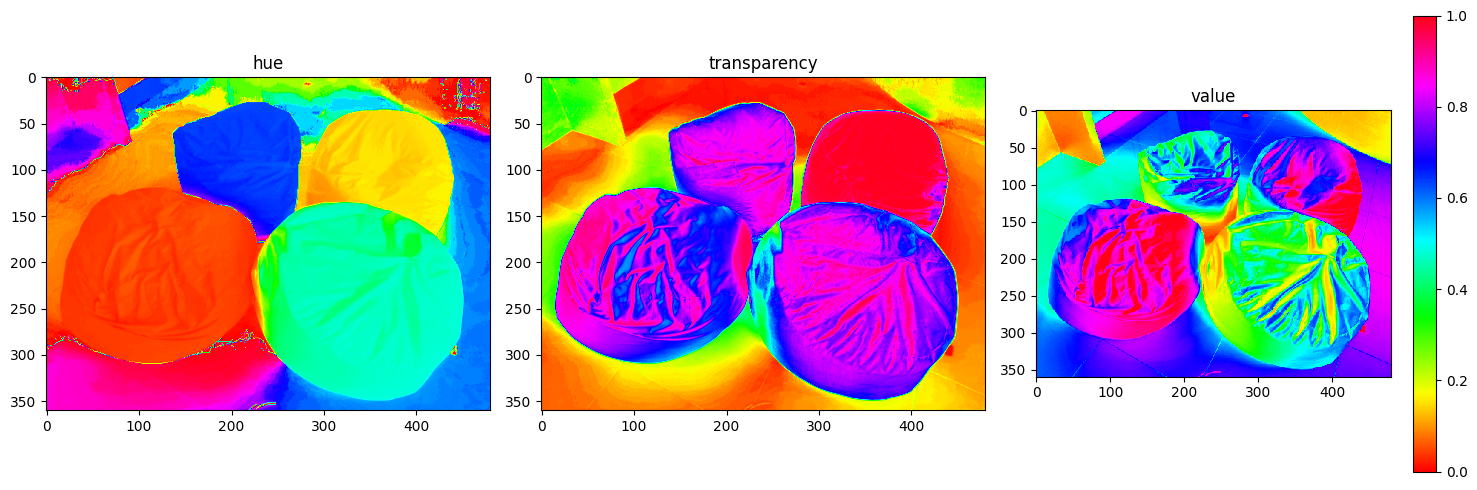

In [252]:
img = cv2.imread('bags.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_img = rgb2hsv(img)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(hsv_img[:,:,0], cmap='hsv')
ax[0].set_title('hue')

ax[1].imshow(hsv_img[:,:,1], cmap='hsv')
ax[1].set_title('transparency')

ax[2].imshow(hsv_img[:,:,2], cmap='hsv')
ax[2].set_title('value')

fig.colorbar(imshow(hsv_img[:,:,2], cmap='hsv'))
fig.tight_layout()

**Bolsa azul**

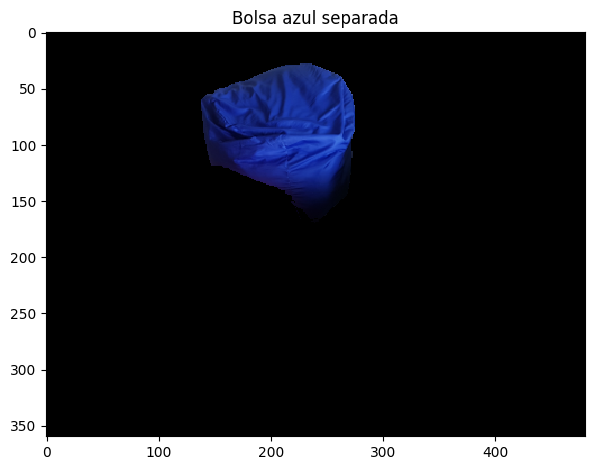

In [253]:
#Hue
lower_mask = hsv_img[:,:,0] > 0.6
upper_mask = hsv_img[:,:,0] < 0.7

#Saturation 
saturation_mask = hsv_img[:,:,1] > 0.5

mask2 = upper_mask*lower_mask*saturation_mask
red = img[:,:,0]*mask2
green = img[:,:,1]*mask2
blue = img[:,:,2]*mask2

img_masked = np.dstack((red, green, blue))
plt.title('Bolsa azul separada')
imshow(img_masked)

**Bolsa amarilla**

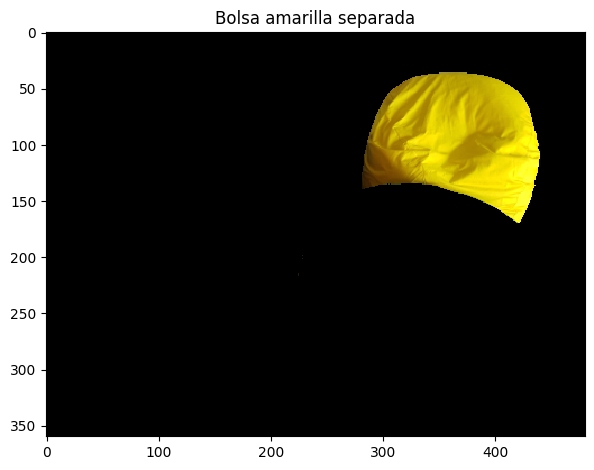

In [254]:
#Hue
lower_mask = hsv_img[:,:,0] > 0.08
upper_mask = hsv_img[:,:,0] < 0.2

#Saturation 
saturation_mask = hsv_img[:,:,1] > 0.65

mask2 = upper_mask*lower_mask*saturation_mask
red = img[:,:,0]*mask2
green = img[:,:,1]*mask2
blue = img[:,:,2]*mask2

img_masked = np.dstack((red, green, blue))
plt.title('Bolsa amarilla separada')
imshow(img_masked)

**Bolsa naranja**

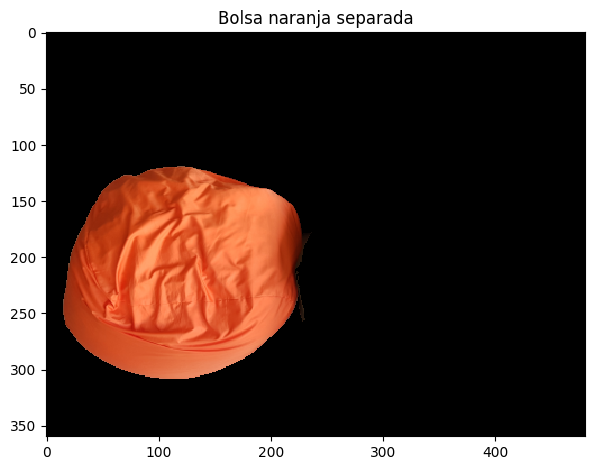

In [255]:
#Hue
lower_mask = hsv_img[:,:,0] > 0.0
upper_mask = hsv_img[:,:,0] < 0.08

#Saturation 
saturation_mask = hsv_img[:,:,1] > 0.5

mask2 = upper_mask*lower_mask*saturation_mask
red = img[:,:,0]*mask2
green = img[:,:,1]*mask2
blue = img[:,:,2]*mask2

img_masked = np.dstack((red, green, blue))
plt.title('Bolsa naranja separada')
imshow(img_masked)

**Bolsa verde**

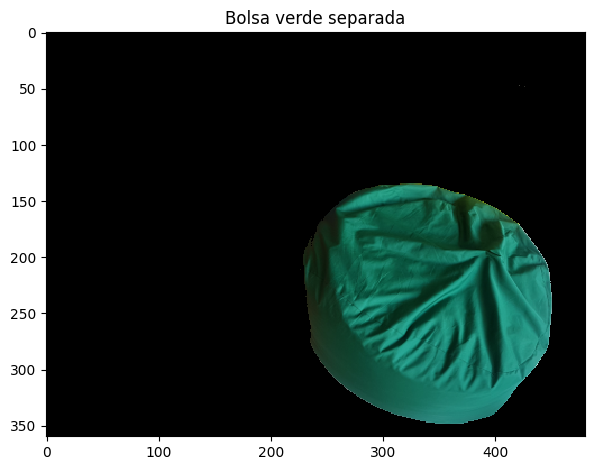

In [256]:
#Hue
lower_mask = hsv_img[:,:,0] > 0.19
upper_mask = hsv_img[:,:,0] < 0.5

#Saturation 
saturation_mask = hsv_img[:,:,1] > 0.1

mask2 = upper_mask*lower_mask*saturation_mask
red = img[:,:,0]*mask2
green = img[:,:,1]*mask2
blue = img[:,:,2]*mask2

img_masked = np.dstack((red, green, blue))
plt.title('Bolsa verde separada')
imshow(img_masked)

**Cuatro bolsas**

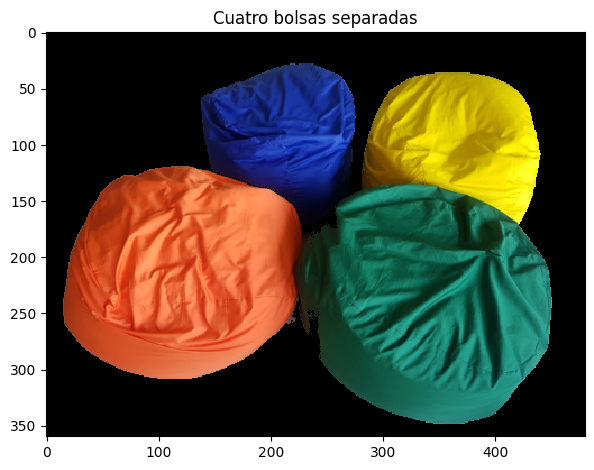

In [257]:
#Hue
lower_mask = hsv_img[:,:,0] > 0.0
upper_mask = hsv_img[:,:,0] < 0.8

#Saturation 
saturation_mask = hsv_img[:,:,1] > 0.42


mask2 = upper_mask*lower_mask*saturation_mask
red = img[:,:,0]*mask2
green = img[:,:,1]*mask2
blue = img[:,:,2]*mask2

img_masked = np.dstack((red, green, blue))
plt.title('Cuatro bolsas separadas')
imshow(img_masked)